# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s=pd.Series([100,20,70,90,150],index=["사과","귤","배","복숭아","딸기"])



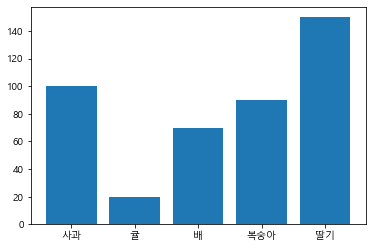

In [5]:
plt.bar(s.index,s)
plt.show()

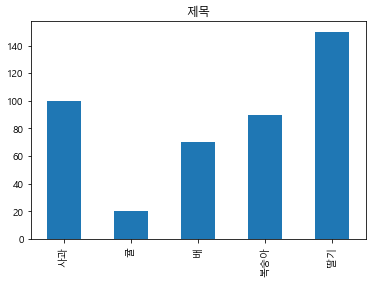

In [9]:
s.plot(kind='bar') #막대그래프를 그리고 싶으면 plot을 그린다.  index이름: label, value:data 를 이용해서 그린다.
plt.title("제목")
plt.show()

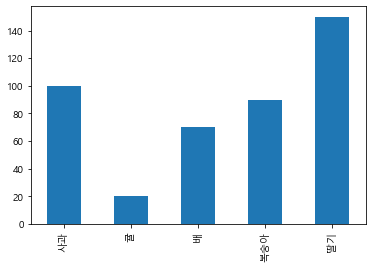

In [11]:
s.plot.bar() #plot accessor
plt.show()

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [12]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

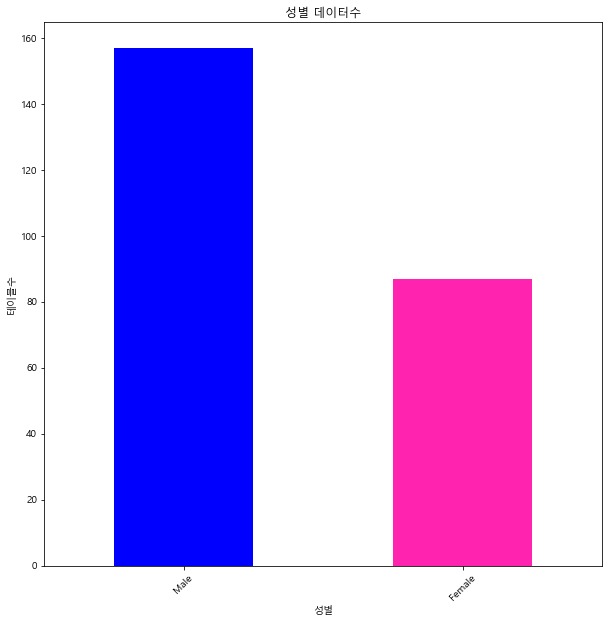

In [25]:
#뭐 대강 이런 식으로 설정할 수 있다. 메소드나 요소들을 잘 보도록 하자.

plt.figure(figsize=(10,10))
tips['sex'].value_counts().plot(kind="bar",title="성별 테이블수",ylabel='table count',xlabel='x:성별',rot=45,color=['blue','#ff23af'])
plt.title("성별 데이터수")
plt.ylabel("테이블수")


plt.xlabel("성별")
plt.show()

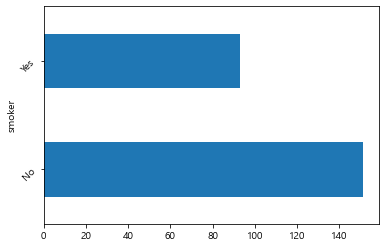

In [28]:
#rot:라벨의 각도를 돌린다.
tips['smoker'].value_counts().plot(kind="barh",rot=45) #수평막대그래프를 그린다.
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [35]:
#흡연여부, 성별로 개수를 세 보자!
count_df=tips.pivot_table(index='smoker',columns='sex',values='tip',aggfunc='count')
count_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


In [36]:
count_df['Male']

smoker
No     97
Yes    60
Name: Male, dtype: int64

<AxesSubplot:xlabel='smoker'>

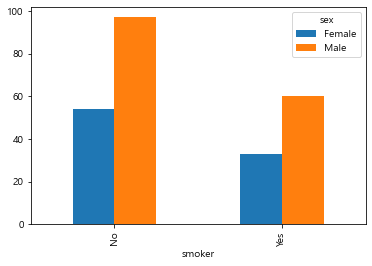

In [38]:
#2개를 같이 보여줄 수 있다.
#컬럼이 두개 이상일 경우 ->각각 막대그래프를 그린다.
count_df.plot(kind='bar')

<AxesSubplot:xlabel='day'>

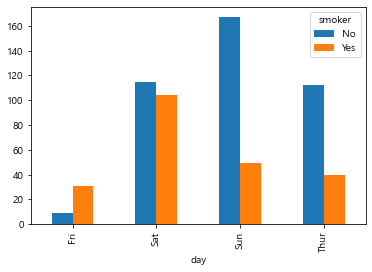

In [40]:
#요일, 흡연여부별 손님수
tips.pivot_table(index="day",columns="smoker",values='size',aggfunc='sum').plot(kind='bar')

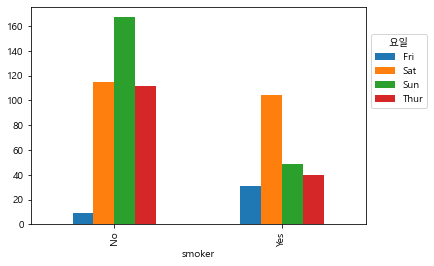

In [44]:
tips.pivot_table(index='smoker',columns='day',values='size',aggfunc='sum').plot(kind='bar')
plt.legend(bbox_to_anchor=(1,0.9),loc='upper left',title="요일")
plt.show()

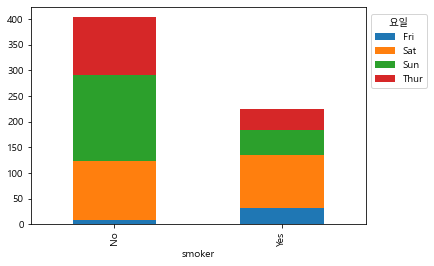

In [55]:
tips.pivot_table(index='smoker',columns='day',values='size',aggfunc='sum').plot(kind='bar',stacked=True) #stacked의 차이를 잘 봐라.
plt.legend(bbox_to_anchor=(1,0.99),loc='upper left',title="요일") #bbox_to_anchor는 뭐랄까 범례를 두는 위치이다.
plt.show()

<AxesSubplot:title={'center':'요일별 bill의 평균'}, xlabel='day'>

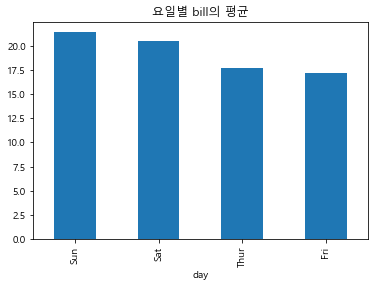

In [50]:
tips.groupby("day")['total_bill'].mean().sort_values(ascending=False).plot(kind='bar',title='요일별 bill의 평균')

## 파이차트

In [56]:
tips['day'].value_counts(normalize=True)

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

In [57]:
day_cnt=tips['day'].value_counts()
day_cnt

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

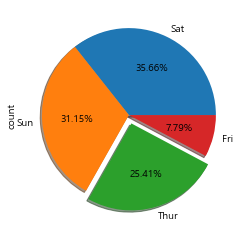

In [63]:
day_cnt.plot(kind='pie',autopct='%.2f%%',fontsize=10,explode=[0,0,0.1,0],shadow=True)
plt.show()

<AxesSubplot:ylabel='count'>

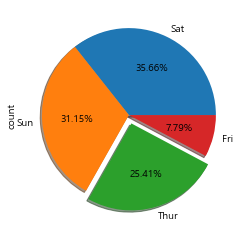

In [64]:
day_cnt.plot.pie(autopct='%.2f%%',fontsize=10,explode=[0,0,0.1,0],shadow=True)
#위의 것과 잘 비교해보자. 거의 비슷하지만 다른 점도 있다.

## 히스토그램, KDE(밀도그래프)

In [65]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:ylabel='Frequency'>

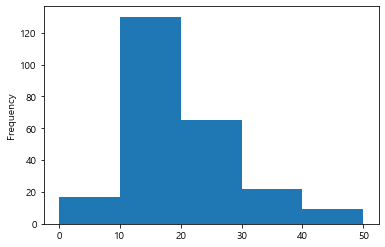

In [71]:
tips['total_bill'].plot(kind='hist',bins=[0,10,20,30,40,50])

#plot메소드를 통해 hist를 그린다. (히스토그램을 그린다.)
#bins를 통해 범위를 바꿀 수 있다는 점을 숙지하자.

<AxesSubplot:ylabel='Frequency'>

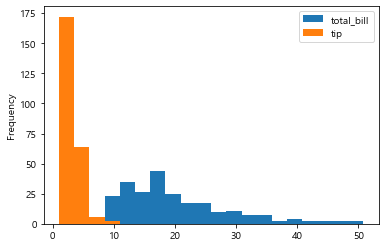

In [73]:
#Dataframe -> 컬럼별
#이렇게 그리는 방법도 꽤 많으니 참고하시라.

tips[['total_bill','tip']].plot.hist(bins=20)

In [78]:
#새로운 메소드를 불러온다.
#sci는 science의 sci이다.
pip install scipy

SyntaxError: invalid syntax (<ipython-input-78-00e17372a100>, line 3)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:ylabel='Density'>

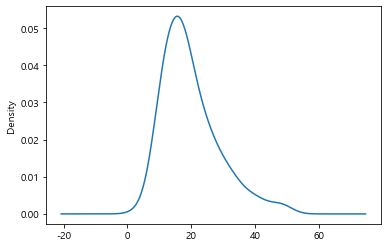

In [79]:
#커널 밀도 추정 함수

tips['total_bill'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

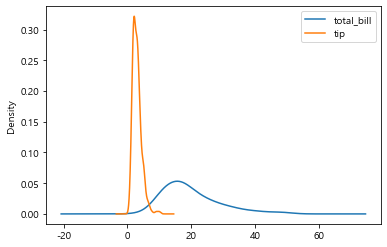

In [81]:
#두 개 이상의 데이터를 kde로 표현이 가능하다.
tips[['total_bill','tip']].plot.kde()

## Boxplot (상자그래프)

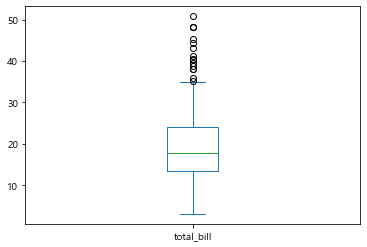

In [88]:
tips['total_bill'].plot(kind='box',whis=1)
#whis메소드를 통해 정상 범위를 넓히거나 줄일 수 있다.

plt.show()

<AxesSubplot:>

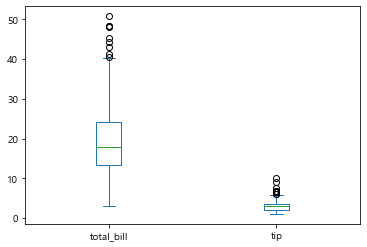

In [91]:
tips[['total_bill','tip']].plot.box()

## scatter plot (산점도) 

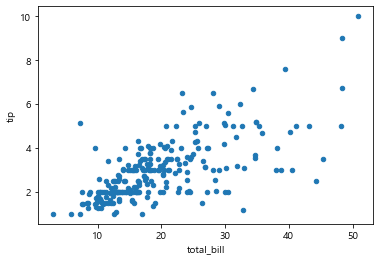

In [94]:
#DataFrame.plot(kind='scatter',x="컬럼명",y="컬럼명")
tips.plot(kind='scatter',x='total_bill',y='tip')
plt.show()

In [95]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [100]:
##파이썬 날짜/시간 타입-datetime 모듈
##'날짜와 시간 타입을 알아보겠다!'라고 생각이 든다면 datetime 모듈을 쓰자.

from datetime import datetime #날짜와 시간 타입(일시 타입)
from datetime import date #날짜
from datetime import time #시간


In [105]:
#객체 생성

d = date(year=2023,month=9,day=10)
t = time(hour=21,minute=23,second=20)
dt = datetime(year=2023,month=9,day=10,hour=21,minute=23,second=20)
print(d)
print(t)
print(dt)

2023-09-10
21:23:20
2023-09-10 21:23:20


In [106]:
#실행시점을 이용해서 생성

today = date.today()
ct = datetime.now()
print(today)
print(ct)

2023-09-22
2023-09-22 15:09:22.710395


In [108]:
today.year, today.month, today.day

(2023, 9, 22)

In [112]:
ct.year, ct.month, ct.day,ct.hour,ct.minute,ct.second
#이런 식으로 현재 시간을 출력할 수 있다.

(2023, 9, 22, 15, 9, 22)

In [121]:
###날짜,시간,일시 => 원하는 형식의문자열 반환
###strftime() 메소드
s=ct.strftime("%y년 %m월 %d일 %H시 %M분 %S초")
print(type(s))
s #type이 str로 변화한 것을 알 수 있다.


<class 'str'>


'23년 09월 22일 15시 09분 22초'

In [123]:
#일시형식의 문자열을 datetime으로 변환-----근데 이게 이렇게 까지 쓸모가 있나?
#strptime

dt = datetime.strptime('2023년 09월 22일 15시 09분 11초',"%Y년 %m월 %d일 %H시 %M분 %S초")
print(type(dt))
dt

<class 'datetime.datetime'>


datetime.datetime(2023, 9, 22, 15, 9, 11)

In [129]:
##일/시에서 특정 일시를 빼거나 더한 날짜를 계산.
##### datetime.timedela: 계산하려는 일시
###### 그냥 계산하는 방법을 유의깊게 보는 걸로 하자.
from datetime import timedelta

In [131]:
now = datetime.now()
#3일 (timedelta) 후
print(now + timedelta(days=3))
#3일 (timedelta) 전
print(now - timedelta(days=3))

2023-09-25 15:24:51.296958
2023-09-19 15:24:51.296958


In [134]:
# weeks, days, hours, minutes, seconds, microseconds(1/100만 초)
# 3주 후의 날짜

print(now + timedelta(weeks=3))
print(now + timedelta(days=3,hours=10)) #3일 10시간 후

2023-10-13 15:24:51.296958
2023-09-26 01:24:51.296958


In [135]:
#위에 있는 정도로만 기억을 하면 좋을 것 같아여 ^^

In [ ]:
##판다스에서의 날짜와 시간 - Timestamp


##날짜와 시간을 나노초 단위로 관리한다.



In [138]:
import pandas as pd

pd.Timestamp(year=2010,month=12,day=21)
pd.Timestamp(year=2010,month=12,day=21,hour=11,minute=30,second=22)


Timestamp('2010-12-21 11:30:22')

In [140]:
##문자열로도 넣을 수 있다.
##날짜는 -로 구분, 시간은 :로 구분

pd.Timestamp("2000-10-22")
pd.Timestamp("2000-10-22 10:22:33")

Timestamp('2000-10-22 10:22:33')

In [142]:
s = pd.Series(['2000-10-10','2000-10-12','2000-11-10','2010-10-11','2004-11-5'])
print(s.dtype)
s2 = pd.to_datetime(s)
s2

object


0   2000-10-10
1   2000-10-12
2   2000-11-10
3   2010-10-11
4   2004-11-05
dtype: datetime64[ns]

In [143]:
#accessor: df=>Series가 Timestamp일 때 사용할 수 있는 속성/메소드를 제공



In [144]:
s2.dt.year

0    2000
1    2000
2    2000
3    2010
4    2004
dtype: int32

In [146]:
s2.dt.month #뭐 이런 식으로 바꿀 수 있다.

0    10
1    10
2    11
3    10
4    11
dtype: int32

In [147]:
###특정 기간만큼 지나거나 전의 날짜를 계산


s2+pd.Timedelta(days=20)


0   2000-10-30
1   2000-11-01
2   2000-11-30
3   2010-10-31
4   2004-11-25
dtype: datetime64[ns]

In [149]:
s2 - pd.Timedelta(weeks=5,days=10,hours=10)

0   2000-08-25 14:00:00
1   2000-08-27 14:00:00
2   2000-09-25 14:00:00
3   2010-08-26 14:00:00
4   2004-09-20 14:00:00
dtype: datetime64[ns]

In [150]:
pd.date_range('2023-1-1',freq='M',periods=5) #뭐....이런 것도 있다.


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='M')

In [151]:
pd.date_range('2023-1-1',freq='MS',periods=5) #뭐....이런 것도 있다.1


DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [152]:
pd.date_range('2023-1-1',freq='Y',periods=5) #뭐....이런 것도 있다.2

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [154]:
pd.date_range('2023-1-1',freq='5YS',periods=5) #뭐....이런 것도 있다.3

DatetimeIndex(['2023-01-01', '2028-01-01', '2033-01-01', '2038-01-01',
               '2043-01-01'],
              dtype='datetime64[ns]', freq='5AS-JAN')

In [158]:
index = pd.date_range('2023-1-1',freq='D',periods=10)
index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [161]:
#이런 것도 있다. 복습을 잘 해 보도록 하자.

index = pd.date_range('2023-1-1',freq='D',periods=10)
value = np.random.randint(1,100,size=(10,3))
df =pd.DataFrame(value,columns=['NO1','NO2','NO3'],index=index)
df

,NO1,NO2,NO3
2023-01-01,84,17,41
2023-01-02,37,86,7
2023-01-03,74,47,33
2023-01-04,55,48,64
2023-01-05,41,7,46
2023-01-06,28,64,3
2023-01-07,81,46,63
2023-01-08,74,37,23
2023-01-09,58,75,88
2023-01-10,89,24,10


In [167]:
df = pd.read_excel('data/강수량.xlsx') #연도별 강수량이다.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   계절      4 non-null      object 
 1   2009    4 non-null      float64
 2   2010    4 non-null      float64
 3   2011    4 non-null      float64
 4   2012    4 non-null      float64
 5   2013    4 non-null      float64
 6   2014    4 non-null      float64
 7   2015    4 non-null      float64
 8   2016    4 non-null      float64
 9   2017    4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 448.0+ bytes


In [169]:
df=df.set_index("계절").T
df.rename_axis("년도",axis=0,inplace=True)

In [176]:
df.index = pd.to_datetime(df.index,format="%Y") #이런 식으로 index를 바꿀 수 있다.

In [177]:
df

계절,봄,여름,가을,겨울
년도,,,,
2009-01-01,231.3,752.0,143.1,142.3
2010-01-01,302.9,692.6,307.6,98.7
2011-01-01,256.9,1053.6,225.5,45.6
2012-01-01,256.5,770.6,363.5,139.3
2013-01-01,264.3,567.5,231.2,59.9
2014-01-01,215.9,599.8,293.1,76.9
2015-01-01,223.2,387.1,247.7,109.1
2016-01-01,312.8,446.2,381.6,108.1
2017-01-01,118.6,609.7,172.5,75.6


<AxesSubplot:xlabel='계절'>

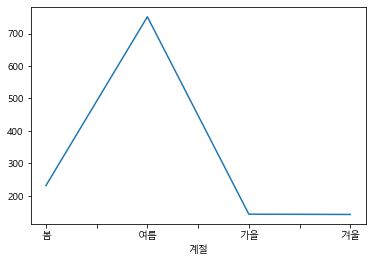

In [178]:
df.loc['2009-01-01'].plot(kind='line')

<AxesSubplot:xlabel='년도'>

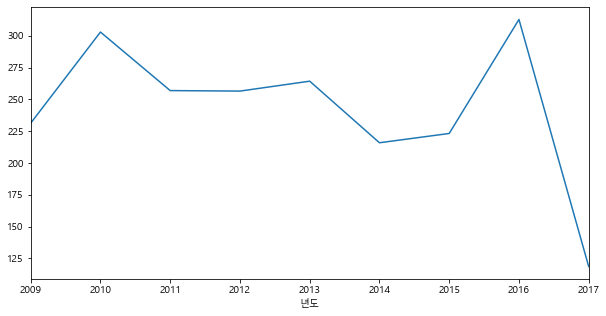

In [179]:
df['봄'].plot(figsize=(10,5))

<AxesSubplot:xlabel='년도'>

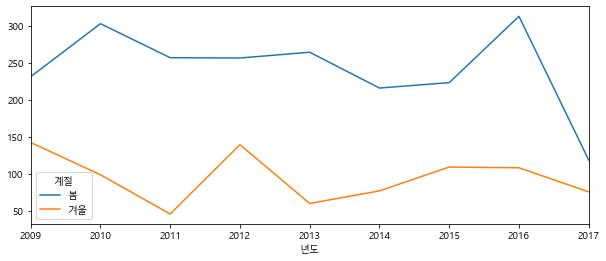

In [181]:
df[['봄','겨울']].plot(figsize=(10,4)) #이런 식으로 흐름을 비교해서 볼 수 있다.

<AxesSubplot:xlabel='년도'>

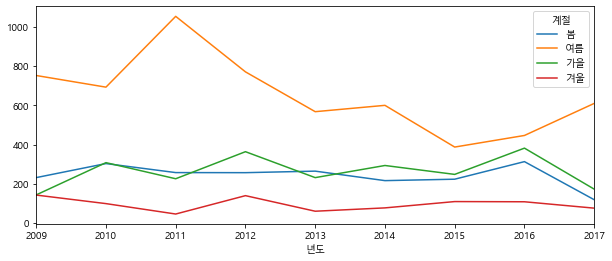

In [182]:
df.plot(figsize=(10,4))